Each GOES image (at 5-minute intervals) takes 3-minutes to complete its scan. Rather than trying to find the exact time that the pixel we care about was scanned, is taking the 5-minute average of CUES good enough?

Look at a plot of CUES (snow surface temperature, and air temperature) as temperature changes the fastest (an early morning or late evening).

Resample/average CUES at different intervals (what I am most concerned about is averaging the original 1-minute to 5-minute means), then see how much of a difference it makes (compared to original CUES temperatures)


In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

Open original CUES (1-minute)

In [2]:
cues_1min = pd.read_pickle('data/CUES_L1_Temp_Rad_Snowdepth_2017-2020_lw.pkl')
cues_1min = cues_1min.to_xarray()

Open resampled CUES (5-minute means)

In [3]:
cues_5min = pd.read_pickle('data/goes-cues_2017-2020.pkl')
cues_5min = cues_5min['2017-04-19':].to_xarray().squeeze()

Plot temperatures together:

Differences (5-minute - 1-minute):
Tair: 0.052592090778220246
Tsnow: 0.09252265221441291


/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


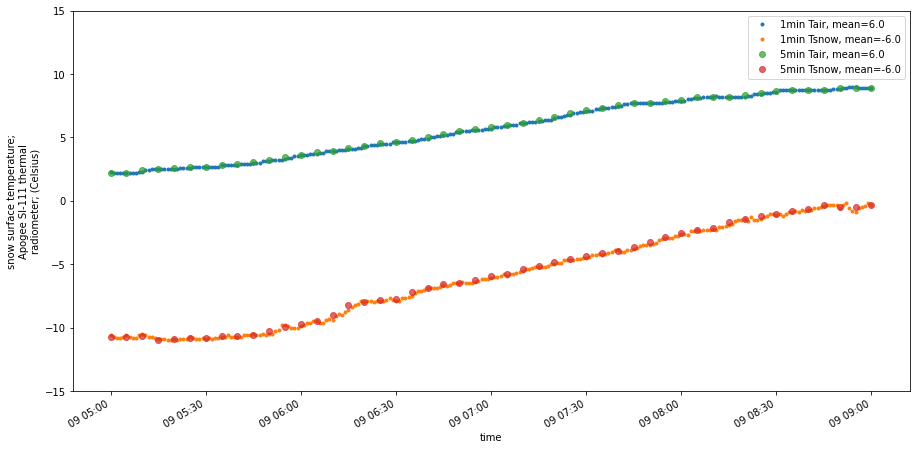

In [4]:
# pick start and end times
startdate = pd.Timestamp('2018-04-09T05')
enddate = pd.Timestamp('2018-04-09T09')

# time slice from 1-minute series
tair_1min = cues_1min['Platform temperature; platform temperature/relative humidity; (degrees Celsius)'].sel(datetime=slice(startdate,enddate))
tsnow_1min = cues_1min['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)'].sel(datetime=slice(startdate,enddate))
# time slice from 5-minute series
tair_5min = cues_5min['Platform temperature; platform temperature/relative humidity; (degrees Celsius)'].sel(time=slice(startdate,enddate))
tsnow_5min = cues_5min['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)'].sel(time=slice(startdate,enddate))

# plot
plt.figure(figsize=(15,7))

tair_1min.plot(linestyle='none',marker='.',label='1min Tair, mean={}'.format(np.round(tair_1min.mean().values),3))
tsnow_1min.plot(linestyle='none',marker='.',label='1min Tsnow, mean={}'.format(np.round(tsnow_1min.mean().values),3))

tair_5min.plot(linestyle='none',marker='o',alpha=0.7,label='5min Tair, mean={}'.format(np.round(tair_5min.mean().values),3))
tsnow_5min.plot(linestyle='none',marker='o',alpha=0.7,label='5min Tsnow, mean={}'.format(np.round(tsnow_5min.mean().values),3))

print("Differences (5-minute - 1-minute):")
print("Tair: {}".format(tair_5min.mean().values - tair_1min.mean().values))
print("Tsnow: {}".format(tsnow_5min.mean().values - tsnow_1min.mean().values))

#plt.xlim((startdate,enddate))
plt.ylim((-15,15))
plt.legend()

If I look at the morning of 2018-04-09, the difference between the 5-minute and 1-minute values are ~0.05 for Tair, and ~0.09 for Tsnow. Therefore, by taking the 5-minute mean of these temperatures I am adding a slight positive bias.

If I look at the whole timeseries, the differences are ~0.04 for Tair, and ~0.17 for Tsnow.